In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

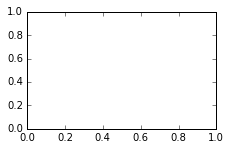

In [2]:
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 12
small_label_size = 16

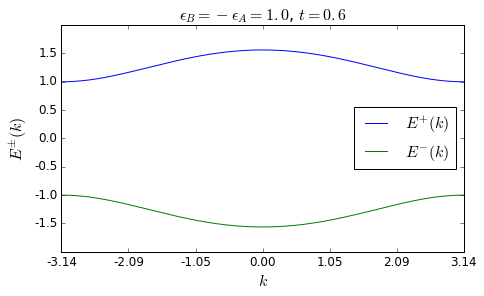

In [3]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width*visu_factor,
                                  fig_height*visu_factor),
                       dpi=400, frameon=False)

# Inputs of the problem
epsilon_a = -1.0
epsilon_b = -epsilon_a
epsilon = epsilon_b - epsilon_a
hopping_constant = 0.6
lattice_constant = 1.0

# x-axis array for plotting
kmax = np.pi / lattice_constant
kmin = -kmax
k_values = np.linspace(kmin, kmax, 10000)

# Compute energies
energy_plus = np.sqrt(epsilon**2 / 4.0 + 2.0 * hopping_constant**2 *
                     (1.0 + np.cos(k_values * lattice_constant)))
energy_minus = -energy_plus

# Plot
ax.plot(k_values, energy_plus, label=r'$E^{+}(k)$')
ax.plot(k_values, energy_minus, label=r'$E^{-}(k)$')

# y-axis ticks
nb_yticks = 7
ymax = np.int(np.sqrt(epsilon**2 / 4.0 + 4.0 * hopping_constant**2)) + 0.5
ymin = -ymax
yticks = np.linspace(ymin, ymax, nb_yticks, endpoint=True)
ax.set_yticks(yticks)
ax.set_yticklabels(['%1.1f'  %elem for elem in yticks])

# x-axis ticks
nb_xticks = 7
ax.set_xlim([kmin, kmax])
xticks = np.linspace(kmin, kmax, nb_xticks, endpoint=True)
ax.set_xticks(xticks)
ax.set_xticklabels(['%1.2f'  %elem for elem in xticks])

# Axis labels and title
ax.set_ylabel(r'$E^{\pm}(k)$', fontsize=small_label_size)
ax.set_xlabel(r'$k$', fontsize=small_label_size)
ax.legend(fontsize=small_label_size, loc=5)
plt.title(r"$\epsilon_B = - \epsilon_A = {0}$, $t = {1}$".format(epsilon_b,
                                                                 hopping_constant),
            fontsize = small_label_size)

# font size for ticks
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)

plt.tight_layout()
plt.savefig('dispersion.pdf')

In [4]:
# Compute band projections
alpha_k_plus = 1.0 / (1.0 + (epsilon_a - energy_plus) / (epsilon_b - energy_plus))
alpha_k_minus = 1.0 / (1.0 + (epsilon_a - energy_minus) / (epsilon_b - energy_minus))

beta_k_plus = 1.0 / (1.0 + (epsilon_b - energy_plus) / (epsilon_a - energy_plus))
beta_k_minus = 1.0 / (1.0 + (epsilon_b - energy_minus) / (epsilon_a - energy_minus))

/home/dominique/.virtualenvs/dmft/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/home/dominique/.virtualenvs/dmft/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide


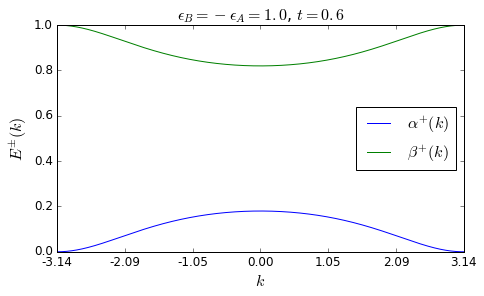

In [5]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width*visu_factor,
                                  fig_height*visu_factor),
                       dpi=400, frameon=False)

# Plot
ax.plot(k_values, alpha_k_plus, label=r'$\alpha^{+}(k)$')
ax.plot(k_values, beta_k_plus, label=r'$\beta^{+}(k)$')

# y-axis ticks
nb_yticks = 6
ymax = 1.0
ymin = 0.0
yticks = np.linspace(ymin, ymax, nb_yticks, endpoint=True)
ax.set_yticks(yticks)
ax.set_yticklabels(['%1.1f'  %elem for elem in yticks])

# x-axis ticks
nb_xticks = 7
ax.set_xlim([kmin, kmax])
xticks = np.linspace(kmin, kmax, nb_xticks, endpoint=True)
ax.set_xticks(xticks)
ax.set_xticklabels(['%1.2f'  %elem for elem in xticks])

# Axis labels and title
ax.set_ylabel(r'$E^{\pm}(k)$', fontsize=small_label_size)
ax.set_xlabel(r'$k$', fontsize=small_label_size)
ax.legend(fontsize=small_label_size, loc=5)
plt.title(r"$\epsilon_B = - \epsilon_A = {0}$, $t = {1}$".format(epsilon_b,
                                                                 hopping_constant), fontsize = small_label_size)

# font size for ticks
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)

plt.tight_layout()
plt.savefig('plus_split.pdf')

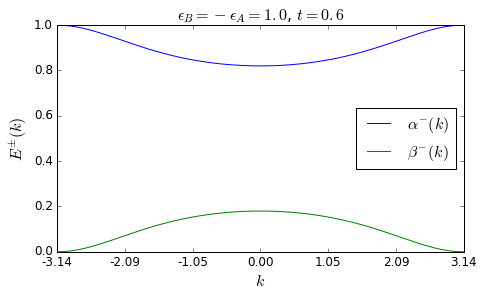

In [6]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width*visu_factor,
                                  fig_height*visu_factor),
                       dpi=400, frameon=False)

# Plot
ax.plot(k_values, alpha_k_minus, label=r'$\alpha^{-}(k)$')
ax.plot(k_values, beta_k_minus, label=r'$\beta^{-}(k)$')

# y-axis ticks
nb_yticks = 6
ymax = 1.0
ymin = 0.0
yticks = np.linspace(ymin, ymax, nb_yticks, endpoint=True)
ax.set_yticks(yticks)
ax.set_yticklabels(['%1.1f'  %elem for elem in yticks])

# x-axis ticks
nb_xticks = 7
ax.set_xlim([kmin, kmax])
xticks = np.linspace(kmin, kmax, nb_xticks, endpoint=True)
ax.set_xticks(xticks)
ax.set_xticklabels(['%1.2f'  %elem for elem in xticks])

# Axis labels and title
ax.set_ylabel(r'$E^{\pm}(k)$', fontsize=small_label_size)
ax.set_xlabel(r'$k$', fontsize=small_label_size)
ax.legend(fontsize=small_label_size, loc=5)
plt.title(r"$\epsilon_B = - \epsilon_A = {0}$, $t = {1}$".format(epsilon_b,
                                                                 hopping_constant), fontsize = small_label_size)

# font size for ticks
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)

plt.tight_layout()
plt.savefig('minus_split.pdf')